In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("salary_data_cleaned.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,49,1,1,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,38,1,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,12,1,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,57,1,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,24,1,1,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "analyst" in title.lower():
        return "analyst"
    elif "machine learning" in title.lower():
        return "mle"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"
def seniority(title):
    if "sr" in title.lower() or "senior" in title.lower() or "sr" in title.lower() or "lead" in title.lower() or "principal" in title.lower():
        return "senior"
    elif "jr" in title.lower() or "jr." in title.lower():
        return "jr"
    else:
        return "na"

In [6]:
df["job_simp"]=df["Job Title"].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [8]:
df["seniority"]=df["Job Title"].apply(seniority)

In [9]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [10]:
#Fix State Los Angeles
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority'],
      dtype='object')

In [11]:
df["job state"]=df.job_state.apply(lambda x: x.strip() if x.strip().lower() != "los angeles" else "CA")

AttributeError: 'DataFrame' object has no attribute 'job_state'

In [12]:
#Job Descrition Length
df["desc_len"]=df["Job Description"].apply(lambda x: len(x))

In [13]:
df.desc_len

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [14]:
#comptetitors count
df["num_copm"]=df["Competitors"].apply(lambda x: len(x.split(",")) if x !="-1" else 0)

In [15]:
df["Competitors"]

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [16]:
#hourly wage to annual 
df["min_salary"]=df.apply(lambda x:x.min_salary*2 if x.hourly==1 else x.min_salary,axis=1)
df["max_salary"]=df.apply(lambda x:x.max_salary*2 if x.hourly==1 else x.max_salary,axis=1)

In [17]:
df["min_salary"]

0      53
1      63
2      80
3      56
4      86
       ..
737    58
738    72
739    56
740    95
741    61
Name: min_salary, Length: 742, dtype: int64

In [18]:
df["company_txt"]=df.company_txt.apply(lambda x:x. replace("\n",""))


In [19]:
df. describe()

,Rating,Founded,hourly,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_copm
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.022911,76.548518,130.200809,100.626011,0.557951,48.591644,0.528302,1.0,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.149721,40.241541,53.634881,38.855948,0.496965,53.778815,0.499535,0.0,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,10.000000,16.000000,13.500000,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,1.0,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,1.0,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,91.750000,158.000000,122.500000,1.000000,61.000000,1.000000,1.0,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,400.000000,500.000000,254.000000,1.000000,278.000000,1.000000,1.0,1.000000,1.000000,1.000000,10051.000000,4.000000


<AxesSubplot:>

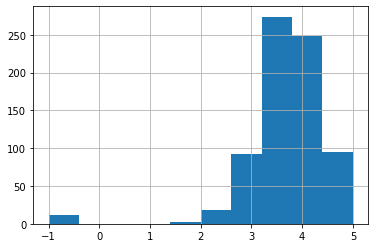

In [21]:
df.Rating.hist()

<AxesSubplot:>

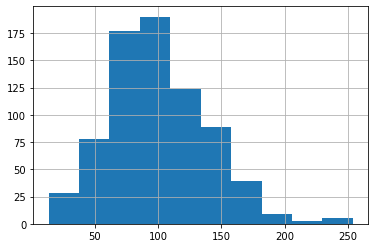

In [22]:
df.avg_salary.hist()


<AxesSubplot:>

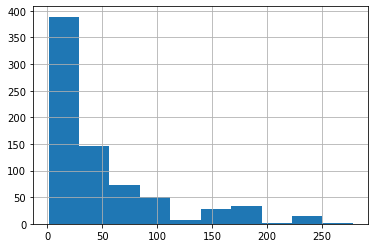

In [23]:
df.age.hist()

<AxesSubplot:>

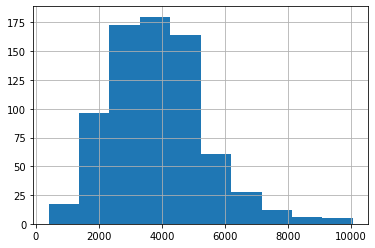

In [24]:
df.desc_len.hist()

<AxesSubplot:>

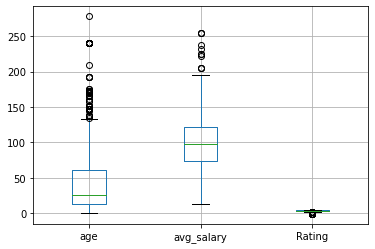

In [25]:
df.boxplot(column=["age","avg_salary","Rating"])

<AxesSubplot:>

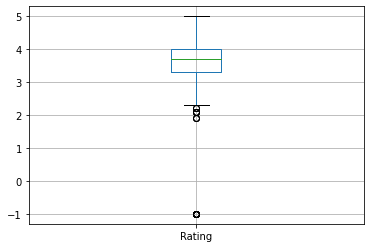

In [26]:
df.boxplot(column=["Rating"])

In [28]:
df[["age","avg_salary","Rating",'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


<AxesSubplot:>

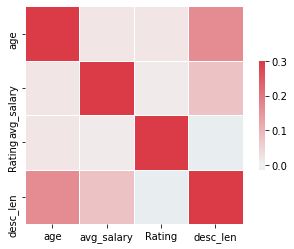

In [35]:
cmap=sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[["age","avg_salary","Rating",'desc_len']].corr(),vmax=.3,center=0,cmap=cmap,square=True,
            linewidths= .5,cbar_kws={'shrink':.5})

In [37]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_copm'],
      dtype='object')

In [38]:
df_cat=df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','company_txt',
       'job state','spark', 'aws',
       'excel', 'job_simp', 'seniority']]

graph for Location: total = 20


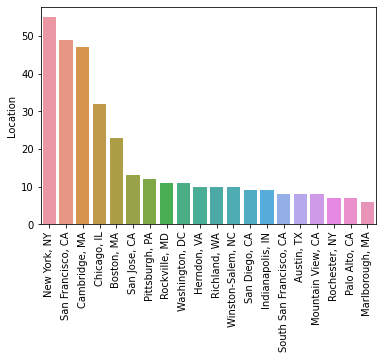

graph for Headquarters: total = 20


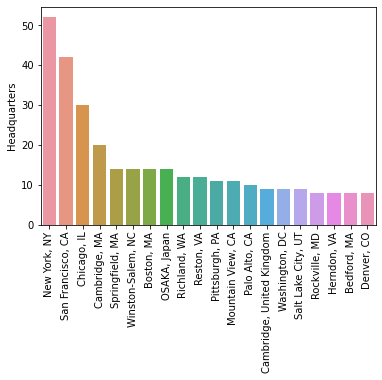

graph for company_txt: total = 20


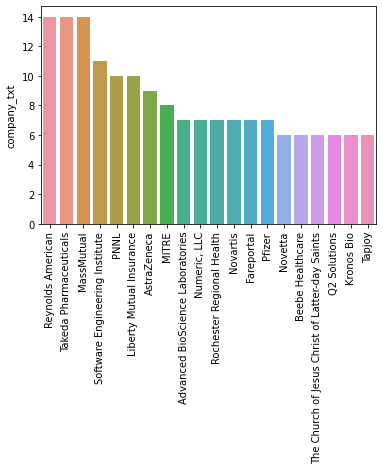

In [51]:
for i in df_cat[['Location', 'Headquarters','company_txt']].columns:
    cat_num=df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d"% (i,len(cat_num)))
    chart=sns.barplot(x=cat_num.index,y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
    plt.show()

In [52]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_copm'],
      dtype='object')

In [54]:
pd.pivot_table(df,index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [60]:
pd.pivot_table(df,index=['job_simp',"seniority"], values='avg_salary').sort_values("seniority") #bunu çok beğendim

,,avg_salary
job_simp,seniority,
analyst,jr,56.500000
data scientist,jr,106.500000
analyst,na,61.155405
data engineer,na,96.701220
data scientist,na,107.043011
director,na,168.607143
manager,na,84.022727
mle,na,119.133333
na,na,73.988189


In [61]:
pd.pivot_table(df,index=['job_simp',"seniority"], values='avg_salary').sort_values("job_simp") #bunu çok beğendim

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [62]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'company_txt',
       'job state', 'same_state', 'age', 'python_yn', 'R_yn', 'spark', 'aws',
       'excel', 'job_simp', 'seniority', 'desc_len', 'num_copm'],
      dtype='object')

In [63]:
#rating,industry,sector,revenue,number of comp,hourly,employer provided,python,r,spark,aws,excel,desc_len,Type of ownership

In [76]:
df_pivots=df[["Rating","Industry","Sector","Revenue","num_copm","hourly","python_yn","R_yn","spark","aws","excel","Type of ownership","avg_salary"]]

In [79]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index=i,values='avg_salary').sort_values('avg_salary',ascending=False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [98]:
from wordcloud import WordCloud,  ImageColorGenerator,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [87]:
words=" ".join(df["Job Description"])

def punctuation_stop(text):
    filtered=[]
    stop_words=set(stopwords.words("english"))
    word_tokens=word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


In [122]:
words_filtered=punctuation_stop(words)

text=" ".join([ele for ele in words_filtered ])

wc=WordCloud(background_color="white",random_state=1, max_words=10)
wc.generate(text)
print(wc)



ImportError: The _imagingft C module is not installed

TypeError: Image data of dtype object cannot be converted to float

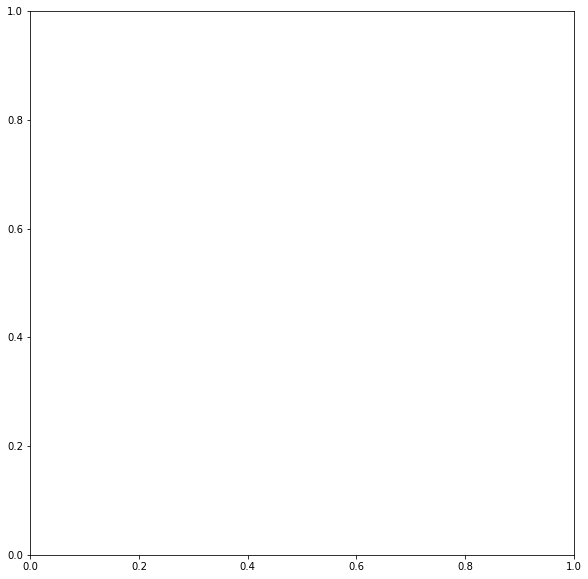

In [112]:
plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [114]:
text

'data scientist location albuquerque nm education required bachelor degree required preferably math engineering business sciences skills required bachelor degree relevant field math data analysis database computer science artificial intelligence ai three years experience credit master degree five years experience credit applicant proficient use power bi tableau python matlab microsoft word powerpoint excel working knowledge ms access lms sas data visualization tools strong algorithmic aptitude excellent verbal written communication skills quantitative analytical skills required applicant must able work team environment citizenship ability obtain dod secret clearance required responsibilities the applicant responsible formulating analytical solutions complex data problems creating data analytic models improve data metrics analyzing customer behavior trends delivering insights stakeholders well designing crafting reports dashboards models algorithms make data insights actionable selectin